# 0. Imports packages, modules and functions

## 0.1. Packages and modules

In [1]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

import datetime

from scipy import stats

## 0.2. Helper functions

## 0.3. Image controls

## 0.4. Loading data

In [2]:
data_raw = pd.read_csv('dataset/churn.csv')
#data_raw.head()

# 1. Data description

In [3]:
data_frame_1 = data_raw.copy()

## 1.1. Renaming the columns

The dataset comes with the kamel case naming style of columns. In general, this type of writing refers to classes, while snake case refers to variables. Changing the naming style for aesthetics and best practices purposes.

In [4]:
data_frame_1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
cols_old = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

# Changing write pattern to snakecase
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# Renaming
data_frame_1.columns = cols_new
data_frame_1.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 1.2. Data dimension

Before doing any further analysis in the dataset, we must know its size.

In [6]:
print( 'Number of rows:    {}'.format(data_frame_1.shape[0]))
print( 'Number of columns: {}'.format(data_frame_1.shape[1]))

Number of rows:    10000
Number of columns: 14


## 1.3. Data types

For each attribute(column), the data read from the dataset CSV may have a type that does not represents properly the attribute itself. We must know its types and change it, if necessary.

In [7]:
data_frame_1.dtypes

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

For instance, we can see that all categorical attributes, such as surname, gender and geography comes with the object type. The types comes from the library NumPy, which categorizes the values in the dataset between different types of numbers, boolean values and everything else is considered an object. 

## 1.4. Checking NA's

It is common for a dataset to come with NA values in different columns. We must verify how "hollow" is the dataset.

In [8]:
data_frame_1.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

From the results above, we can see that there are no NA values in the dataset. However, it is possible to exist inconsistencies in the data.

## 1.5. Descriptive statistical

In order to understand the data behavior in each attribute, it is necessary to understand the statistics behind it. Variables will be divided between numerical and categorical attirbutes, for better understanding.

Numerical attributes will be formed for things such as: age, tenure, balance, credit score, number of products, number of credit cards and estimated salary.

Categorical attributes will inclube both variables with non-numerical values and variables with numerical values that could represent true or false, such as: customer id, surname, geography, gender, has credit card, is active member and exited.

### 1.5.1. Numerical attributes

In [61]:
numerical_att = data_frame_1[['credit_score','age','tenure','balance','num_of_products','estimated_salary']]
numerical_att.head()

,credit_score,age,tenure,balance,num_of_products,estimated_salary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


In [62]:
# Central tendency - mean, median

mean = pd.DataFrame(numerical_att.apply(np.mean)).T
median = pd.DataFrame(numerical_att.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis

std_deviation = pd.DataFrame(numerical_att.apply(np.std)).T
min_value = pd.DataFrame(numerical_att.apply(min)).T
max_value = pd.DataFrame(numerical_att.apply(max)).T
range_values = pd.DataFrame(numerical_att.apply(lambda x: x.max() - x.min())).T
skew = pd.DataFrame(numerical_att.apply(lambda x: x.skew())).T
kurtosis = pd.DataFrame(numerical_att.apply(lambda x: x.kurtosis())).T

numerical_att_stats = pd.concat([min_value, max_value, range_values, mean, median, std_deviation, skew, kurtosis]).T.reset_index()
numerical_att_stats.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
numerical_att_stats

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,credit_score,350.00,850.00,500.00,650.528800,652.000,96.648466,-0.071607,-0.425726
1,age,18.00,92.00,74.00,38.921800,37.000,10.487282,1.011320,1.395347
2,tenure,0.00,10.00,10.00,5.012800,5.000,2.892030,0.010991,-1.165225
3,balance,0.00,250898.09,250898.09,76485.889288,97198.540,62394.285254,-0.141109,-1.489412
4,num_of_products,1.00,4.00,3.00,1.530200,1.000,0.581625,0.745568,0.582981
5,estimated_salary,11.58,199992.48,199980.90,100090.239881,100193.915,57507.617221,0.002085,-1.181518


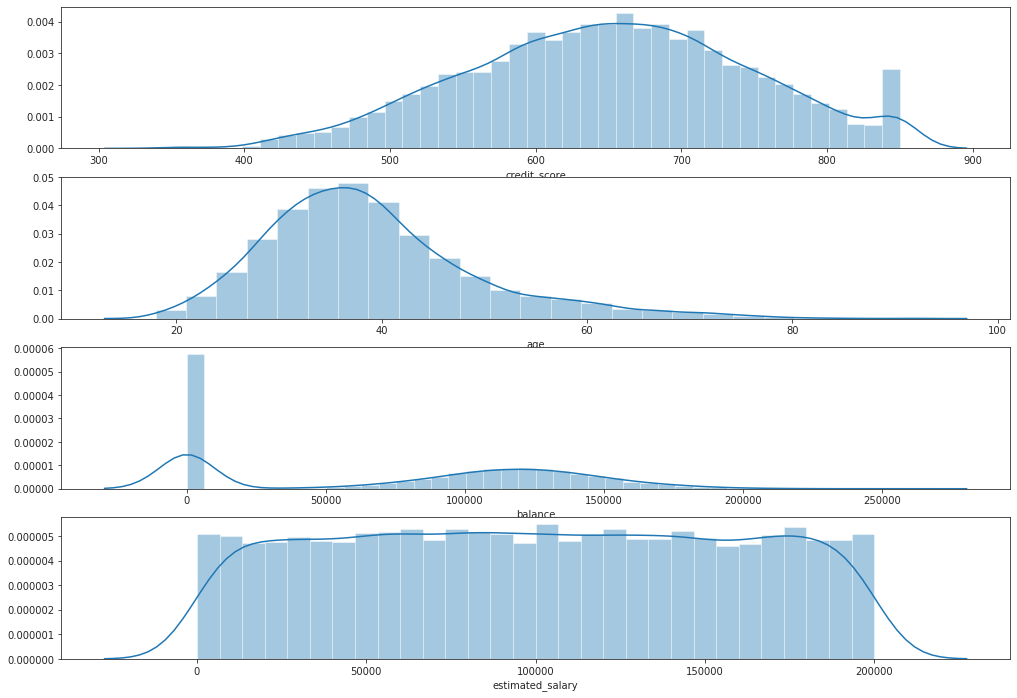

In [63]:
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(17,12))

sns.set_style("ticks")
#sns.axes_style("darkgrid")

sns.distplot(data_frame_1['credit_score'], ax=ax[0])
sns.distplot(data_frame_1['age'], ax=ax[1],bins=25)
sns.distplot(data_frame_1['balance'], ax=ax[2],bins=40)
sns.distplot(data_frame_1['estimated_salary'], ax=ax[3], bins=30)


plt.show()

Initial analysis shows that the estimated salary is well distributed along its range, from USD18.00 to almost USD200000.00. Also, the distribution of balance across different clients, shows that there are a high concentration of people with balance of USD0.00, while the median value is USD97000.00. 

### 1.5.2. Categorical attributes

In [64]:
categorical_att = data_frame_1[['customer_id','surname','geography','gender','has_cr_card','is_active_member','exited']]
categorical_att.head()

,customer_id,surname,geography,gender,has_cr_card,is_active_member,exited
0,15634602,Hargrave,France,Female,1,1,1
1,15647311,Hill,Spain,Female,0,1,0
2,15619304,Onio,France,Female,1,0,1
3,15701354,Boni,France,Female,0,0,0
4,15737888,Mitchell,Spain,Female,1,1,0


Before processing and analyzing the categorical variables, first we must undesrtand how many values exists in each categorical attribute.

In [65]:
categorical_att.apply( lambda x: x.unique().shape[0] )

customer_id         10000
surname              2932
geography               3
gender                  2
has_cr_card             2
is_active_member        2
exited                  2
dtype: int64

For instance, there are 10,000 unique customers, while there are 2,932 unique surnames, which means that the surname isn't a interesting variable since could exist two different customers with the same surname. Also, it is highly unlikely that a surname will have any impact on churn prediction.

In [66]:
categorical_att['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

For geography, we can see that clients comes from 3 different countries, such as: France, Spain and Germany

Despite the gender variable, which could be only male or female, all other categorical variables represents a true or false statement.

# 2. Feature Engineering

In [67]:
data_frame_2 = data_frame_1.copy()

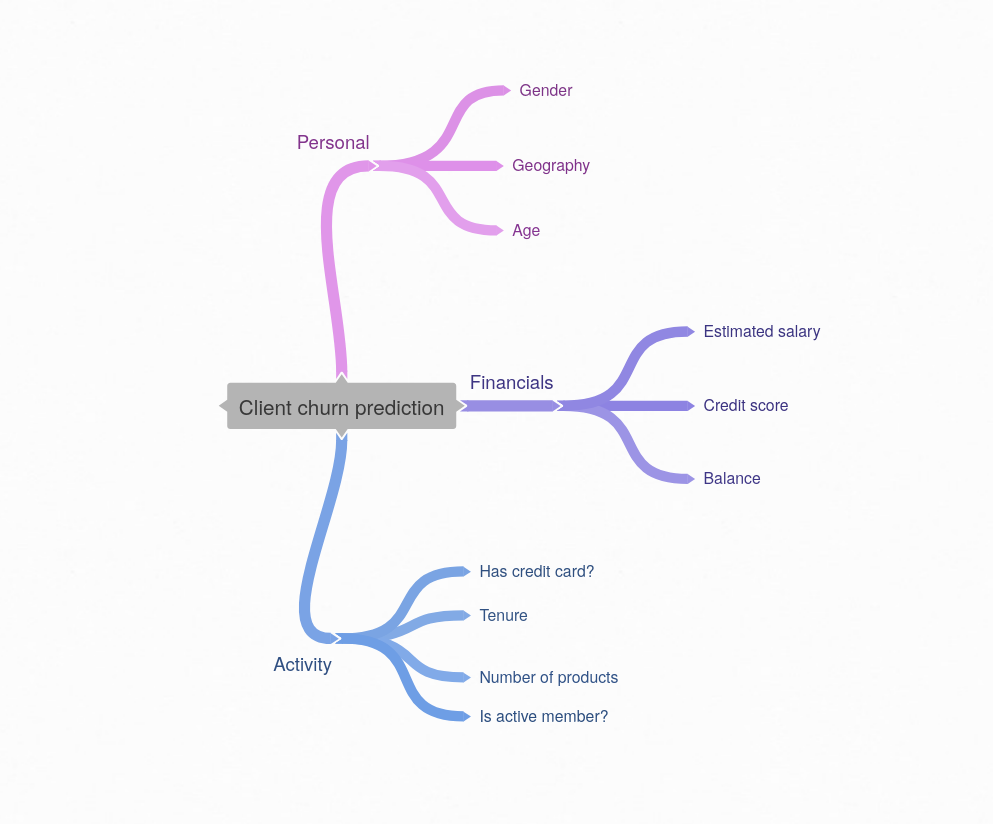

In [68]:
Image('img/MindMapHypothesis.png')

## 2.1. Hypothesis mental map

### 2.1.1. Personal information

**1.** Clients with higher age **should** have a lesser probability of changing its consuming habits, thus reducing the churn probability

**2.** Clients from different nationalities **should** have different probabilities of churn, since the cultural differences **may** impact consuming habits

**3.** Male and female clients **should** have different churn probabilities, since gender **may** have some impact on consuming habits

### 2.1.2. Client financials

**4.** Clients with higher salaries **should** have a higher probability of churn, since other companies **may** try to attract them.

**5.** Clients with higher credit score **should** have a higher probability of churn, since other companies **may** try to attract them.

**6.** Clients with higher balance **should** have a higher probability of churn, since other companies **may** try to attract them.

### 2.1.3. Activity information

**7.** Clients that have a credit card **should** have a lesser probability of churn

**8.** Clients with higher tenure **should** have a lesser probability of churn

**9.** Clients that uses a higher number of products **should** have a lesser probability of churn

**10.** Active clients **should** have a lesser probability of churn

## 2.2. Hypothesis priorization

The hypothesis priorization should be organized both in sense to test which hypothesis is true or based based on data **already** available and in which hypothesis there are some indications that have a higher impact on the churn prediction.

For example, we could consider this priorization:

**10.** Active clients **should** have a lesser probability of churn

**9.** Clients that uses a higher number of products **should** have a lesser probability of churn

**8.** Clients with higher tenure **should** have a lesser probability of churn

**6.** Clients with higher balance **should** have a higher probability of churn, since other companies **may** try to attract them.

**5.** Clients with higher credit score **should** have a higher probability of churn, since other companies **may** try to attract them

**4.** Clients with higher salaries **should** have a higher probability of churn, since other companies **may** try to attract them.

**7.** Clients that have a credit card **should** have a lesser probability of churn

**1.** Clients with higher age **should** have a lesser probability of changing its consuming habits, thus reducing the churn probability

**2.** Clients from different nationalities **should** have different probabilities of churn, since the cultural differences **may** impact consuming habits

**3.** Male and female clients **should** have different churn probabilities, since gender **may** have some impact on consuming habits

In this example, we are considering that information that somehow measures how active the client uses the product have a higher impact than the client's gender or geography.

## 2.3. Feature engineering

At this moment, we should make some transformations on the dataset in a way, such as it could be easier to manipulate the data on the next step and/or transforming existing data in new variables, such as divinding one date into day, month and year. For this dataset, is doest not seem necessary to work on this step.

# 3. Variable filtering

For each problem involving data science and analytics, the dataset may contain information that only does not help understanding the problem, but also may increase its difficulty. To solve this problem, we must filter the information before advancing to the exploratory data analysis. The information can be filtered by two different means: by the lines or by the columns.

## 3.1. Lines filtering

The line filtering involves removing information that are not reliable, does not helps the interpretation or the value of target variable have an important business meaning that explain the line removal.

For example, in a problem involving a store sales prediction, the information contained on a line informing sales of 0 in one day, may represents that, on this day, the store was closed. And this fact, **may** justify the line information.

For this dataset, we have 10,000 lines with 10,000 different customersId and we only have values for the target variable of 0 or 1, meaning that the customer churned or not, so we will not remove any lines.

## 3.2. Columns filtering

Each column in a dataset represent one variable or some aspect of one variable (such as time could be divided in different variables, such as year, month and day), thus making the columns filtering the equivalent of variable filtering.

In this dataset, we can see that there are information that does not help the client churn prediction, for example: surname, row number and customer ID. It is highly unlikely that those variables will have any impact on any prediction model. Thus, we will be removing the surname and row number columns and will keep the customer's ID **only** for data traceability.

In [69]:
cols_drop = ['row_number','surname']

data_frame_2.drop(cols_drop, axis=1)

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


This change in the dataset reduces the dimensions from 10,000 rows and 14 columns to 10,000 rows and **12** columns

# 4. Exploratory data analysis

In [70]:
data_frame_4 = data_frame_2.copy()

On the exploratory data analysis the main objective is to extract insights for the business problem, by: **(a).** confirming or rejecting the hypothesis created, **(b).** proving wrong old beliefs from the business team or **(c).** finding new information that helps the business team.

## 4.1. Univariate analysis

On the first step of the analysis, we will study how the response variable interacts with the variation of the others variables and asking the questions:

**(i).** Is it expected to see this behavior?

**(ii).** Does the business team knows this behavior?

**(iii).** Is there any business reason that explains this behavior?

### 4.1.1. Response variable

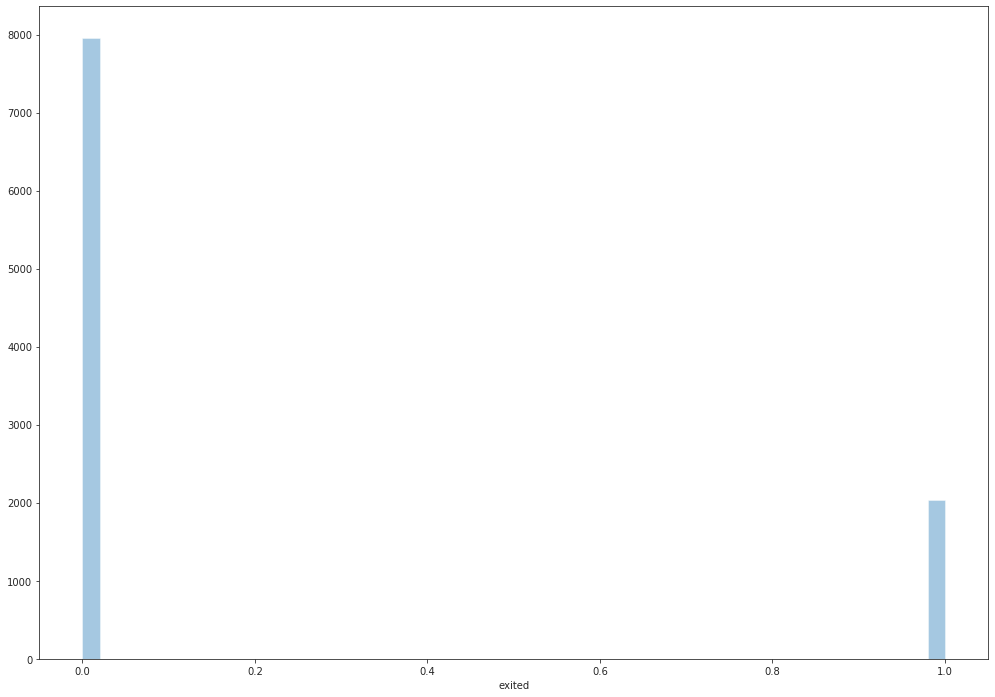

In [71]:
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(17,12))

sns.set_style("ticks")

sns.distplot(data_frame_4['exited'], kde=False, rug=False )


plt.show()

From the distribution graph, we can see that the proportion between customers that have churned is 20\% of the dataset, while clients that have not churn is 80\%. With this information we already know that we are dealing with a problem of disbalanced data, thus making necessary using appropriated methods for those types of problems.

### 4.1.2 Numerical variables

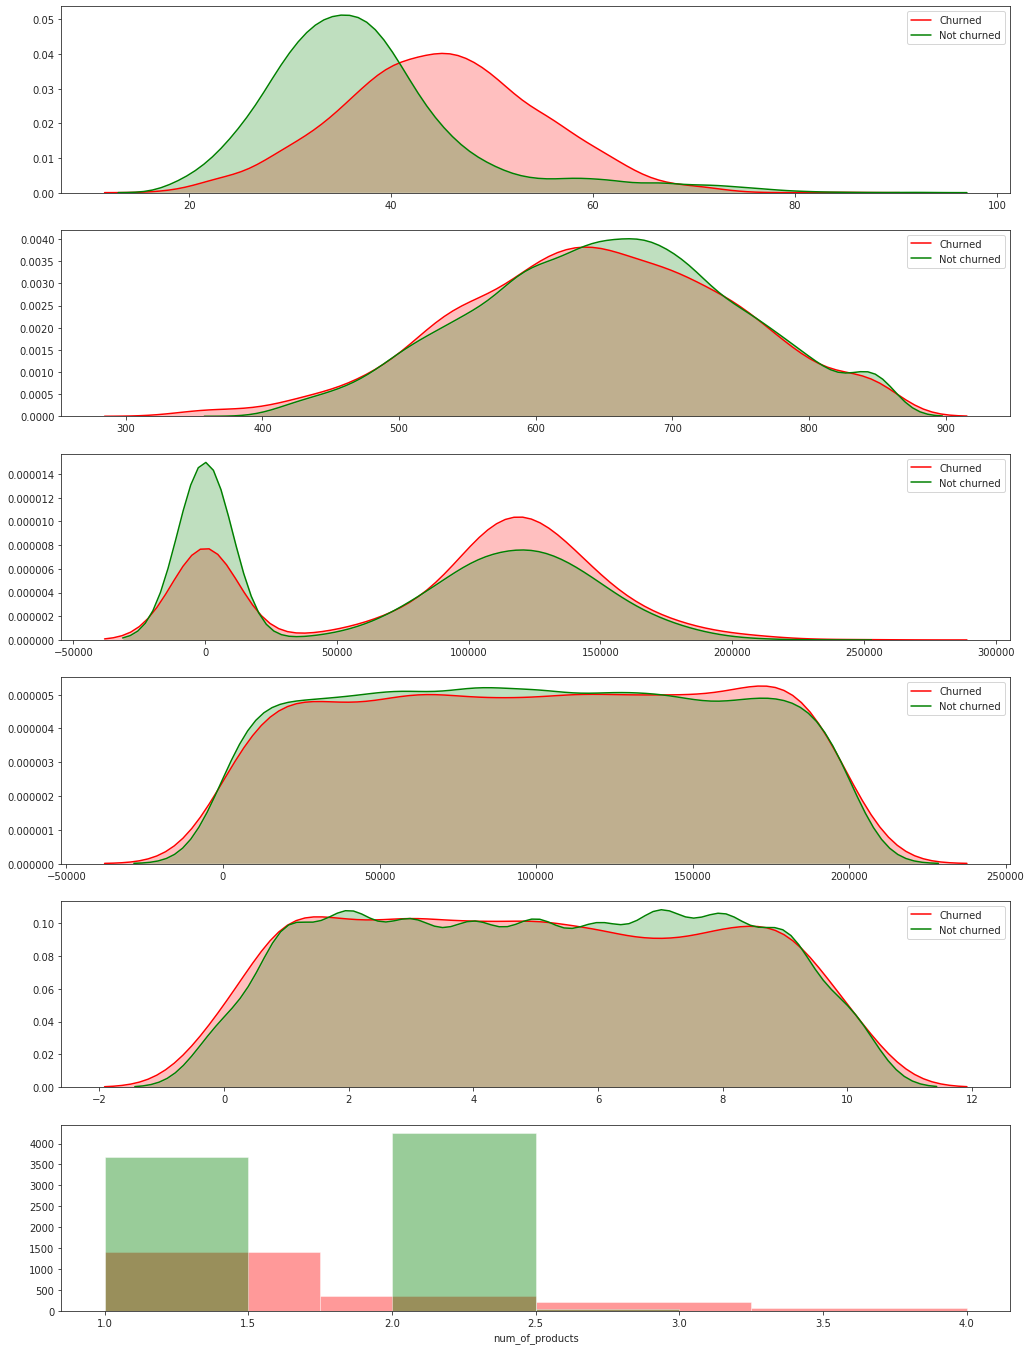

In [104]:
#fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(nrows=6,ncols=1,figsize=(17,24))

sns.set_style("ticks")

# Plot 1
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 1]['age'], label='Churned', shade=True, ax=ax[0], color='red')
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 0]['age'], label='Not churned', shade=True, ax=ax[0], color='green')

# Plot 2
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 1]['credit_score'], label='Churned', shade=True, ax=ax[1], color='red')
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 0]['credit_score'], label='Not churned', shade=True, ax=ax[1], color='green')

# Plot 3
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 1]['balance'], label='Churned', shade=True, ax=ax[2], color='red')
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 0]['balance'], label='Not churned', shade=True, ax=ax[2], color='green')

# Plot 4
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 1]['estimated_salary'], label='Churned', shade=True, ax=ax[3], color='red')
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 0]['estimated_salary'], label='Not churned', shade=True, ax=ax[3], color='green')

# Plot 5
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 1]['tenure'], label='Churned', shade=True, ax=ax[4], color='red')
sns.kdeplot( data_frame_4[data_frame_4['exited'] == 0]['tenure'], label='Not churned', shade=True, ax=ax[4], color='green')

# Plot 6
sns.distplot( data_frame_4[data_frame_4['exited'] == 1]['num_of_products'], label='Churned', ax=ax[5], kde=False, bins=4, color='red')
sns.distplot( data_frame_4[data_frame_4['exited'] == 0]['num_of_products'], label='Not churned', ax=ax[5], kde=False, bins=4, color='green')


plt.show()

From the graphs, we can already evalute some of the hypothesis

### 4.1.3. Categorical variables

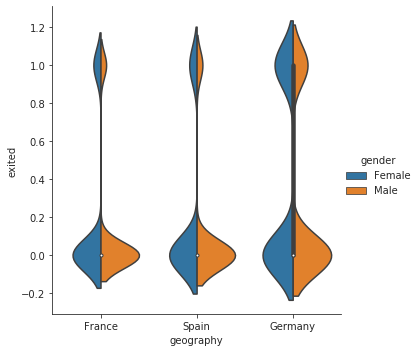

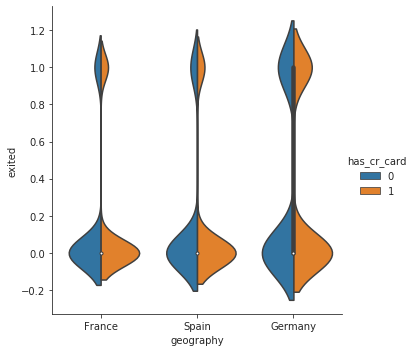

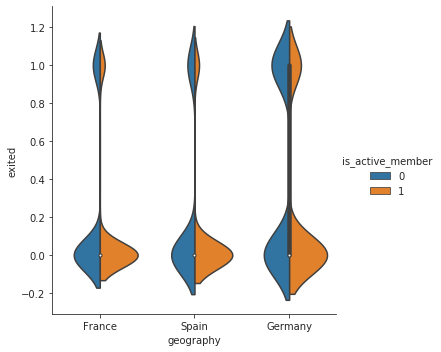

In [28]:
#fig = plt.figure(figsize=(20,10))
#fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(14,10))

sns.set_style("ticks")
#sns.axes_style("darkgrid")

sns.catplot(x="geography", y="exited", hue="gender",kind="violin", split=True, data=categorical_att)
sns.catplot(x="geography", y="exited", hue="has_cr_card",kind="violin", split=True, data=categorical_att)
sns.catplot(x="geography", y="exited", hue="is_active_member",kind="violin", split=True, data=categorical_att)

plt.show()

The graphs shows that germany is the country with the highest proportion of exited clients, which generates some initial insights.